<a href="https://colab.research.google.com/github/sriman21/Sign-Language-Alphabet-Prediction/blob/main/Sign_Language_Alphabet_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

List of moules

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Loaing dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("grassknoted/asl-alphabet")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/asl-alphabet


Dataset path

In [ ]:
dataset_path = "/kaggle/input/asl-alphabetasl_/alphabet_train/asl_alphabet_train"


In [ ]:
dataset_path

'/kaggle/input/asl-alphabetasl_/alphabet_train/asl_alphabet_train'

In [ ]:
import zipfile
import os

zip_path = "/content/asl_alphabet_train.zip"
extract_path = "/content/asl_alphabet_train"

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Unzipped to:", extract_path)


BadZipFile: File is not a zip file

In [ ]:
import os
import matplotlib.pyplot as plt

# ✅ Correct path where your ASL dataset is unzipped or located
dataset_path = '/content/asl_alphabet_train'

class_counts = {}
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        class_counts[class_name] = len(os.listdir(class_dir))

# Sort by class name
class_counts = dict(sorted(class_counts.items()))

# Plot
plt.figure(figsize=(15, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Sign Language Alphabet Classes')
plt.ylabel('Number of Images')
plt.title('Image Distribution per Class in ASL Alphabet Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import os
import matplotlib.pyplot as plt
dataset_path='/kaggle/input/asl-alphabetasl_/alphabet_train/asl_alphabet_train'
class_counts = {}
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        class_counts[class_name] = len(os.listdir(class_dir))

# Sort by class name
class_counts = dict(sorted(class_counts.items()))

# Plot
plt.figure(figsize=(15, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Sign Language Alphabet Classes')
plt.ylabel('Number of Images')
plt.title('Image Distribution per Class in ASL Alphabet Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/asl-alphabetasl_/alphabet_train/asl_alphabet_train'

Data Pre-Processing

In [ ]:
IMG_SIZE = (64, 64)  # Resize images to 64x64
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    validation_split=0.2  # Split data into training & validation
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


NameError: name 'dataset_path' is not defined

Visualize Dataset Distribution (Train vs Validation)

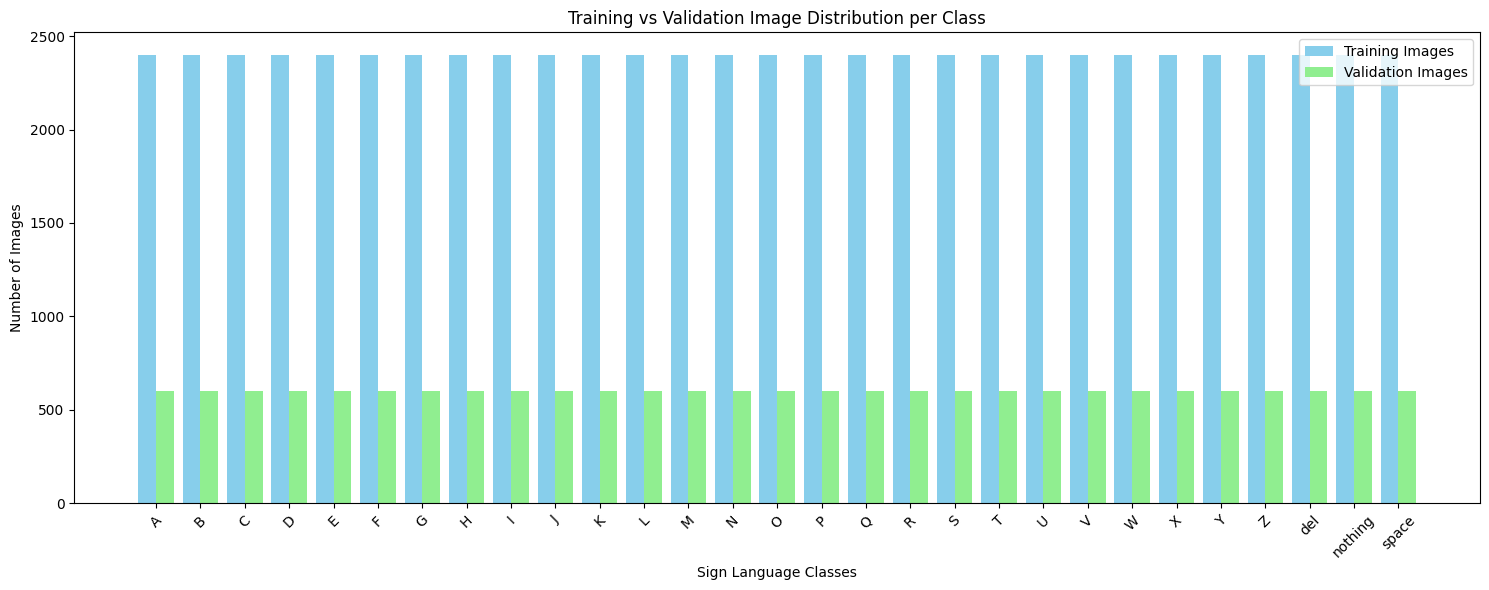

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Values from your dataset
num_classes = 29
train_total = 69600
val_total = 17400

# Assume equal distribution
train_per_class = train_total // num_classes
val_per_class = val_total // num_classes

classes = list(train_data.class_indices.keys())
x = np.arange(len(classes))

# Bar heights
train_counts = [train_per_class] * num_classes
val_counts = [val_per_class] * num_classes

# Plot
plt.figure(figsize=(15, 6))
bar_width = 0.4

plt.bar(x - bar_width/2, train_counts, width=bar_width, label='Training Images', color='skyblue')
plt.bar(x + bar_width/2, val_counts, width=bar_width, label='Validation Images', color='lightgreen')

plt.xlabel('Sign Language Classes')
plt.ylabel('Number of Images')
plt.title('Training vs Validation Image Distribution per Class')
plt.xticks(x, classes, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Model Training

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(train_data.class_indices), activation='softmax')  # Output layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_data, validation_data=val_data, epochs=10)

# Save model
model.save("sign_language_model.h5")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2175/2175 ━━━━━━━━━━━━━━━━━━━━ 432s 198ms/step - accuracy: 0.5815 - loss: 1.4539 - val_accuracy: 0.5815 - val_loss: 1.6828
Epoch 2/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 424s 195ms/step - accuracy: 0.9690 - loss: 0.1014 - val_accuracy: 0.6324 - val_loss: 1.5795
Epoch 3/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 429s 197ms/step - accuracy: 0.9850 - loss: 0.0472 - val_accuracy: 0.6872 - val_loss: 1.4751
Epoch 4/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 418s 192ms/step - accuracy: 0.9896 - loss: 0.0355 - val_accuracy: 0.6863 - val_loss: 1.6592
Epoch 5/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 420s 193ms/step - accuracy: 0.9913 - loss: 0.0274 - val_accuracy: 0.6580 - val_loss: 2.2310
Epoch 6/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 441s 193ms/step - accuracy: 0.9944 - loss: 0.0180 - val_accuracy: 0.7128 - val_loss: 1.5741
Epoch 7/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 422s 194ms/step - accuracy: 0.9951 - loss: 0.0167 - val_accuracy: 0.6782 - val_loss: 2.3611
Epoch 8/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 438s 192ms/step - accuracy: 0.9

Saving the model

In [ ]:
model.save("signlanguagemodel.h5")



Accuracy plot of model

Epoch 1/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 414s 190ms/step - accuracy: 0.9983 - loss: 0.0067 - val_accuracy: 0.7155 - val_loss: 2.1801
Epoch 2/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 423s 195ms/step - accuracy: 0.9977 - loss: 0.0082 - val_accuracy: 0.7223 - val_loss: 1.9490
Epoch 3/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 415s 191ms/step - accuracy: 0.9978 - loss: 0.0086 - val_accuracy: 0.7098 - val_loss: 2.0158
Epoch 4/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 414s 190ms/step - accuracy: 0.9984 - loss: 0.0074 - val_accuracy: 0.6884 - val_loss: 3.0704
Epoch 5/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 413s 190ms/step - accuracy: 0.9975 - loss: 0.0095 - val_accuracy: 0.7195 - val_loss: 2.3709
Epoch 6/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 441s 190ms/step - accuracy: 0.9986 - loss: 0.0073 - val_accuracy: 0.7279 - val_loss: 2.1760
Epoch 7/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 419s 193ms/step - accuracy: 0.9978 - loss: 0.0095 - val_accuracy: 0.7350 - val_loss: 2.1268
Epoch 8/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 413s 190ms/step - ac

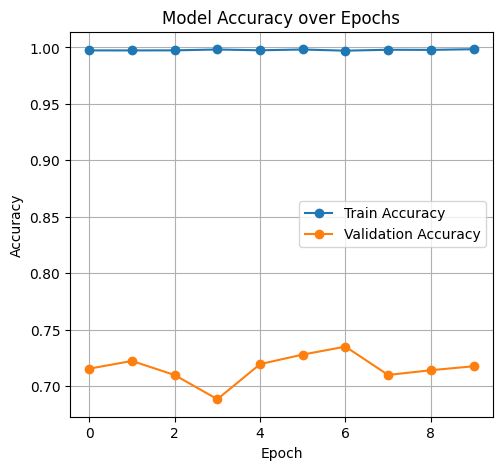

In [ ]:
import matplotlib.pyplot as plt
history = model.fit(train_data, validation_data=val_data, epochs=10)
# Accuracy plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)




Confusion Matrix & Classification Report

Dataset base path: /kaggle/input/asl-alphabet
Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1

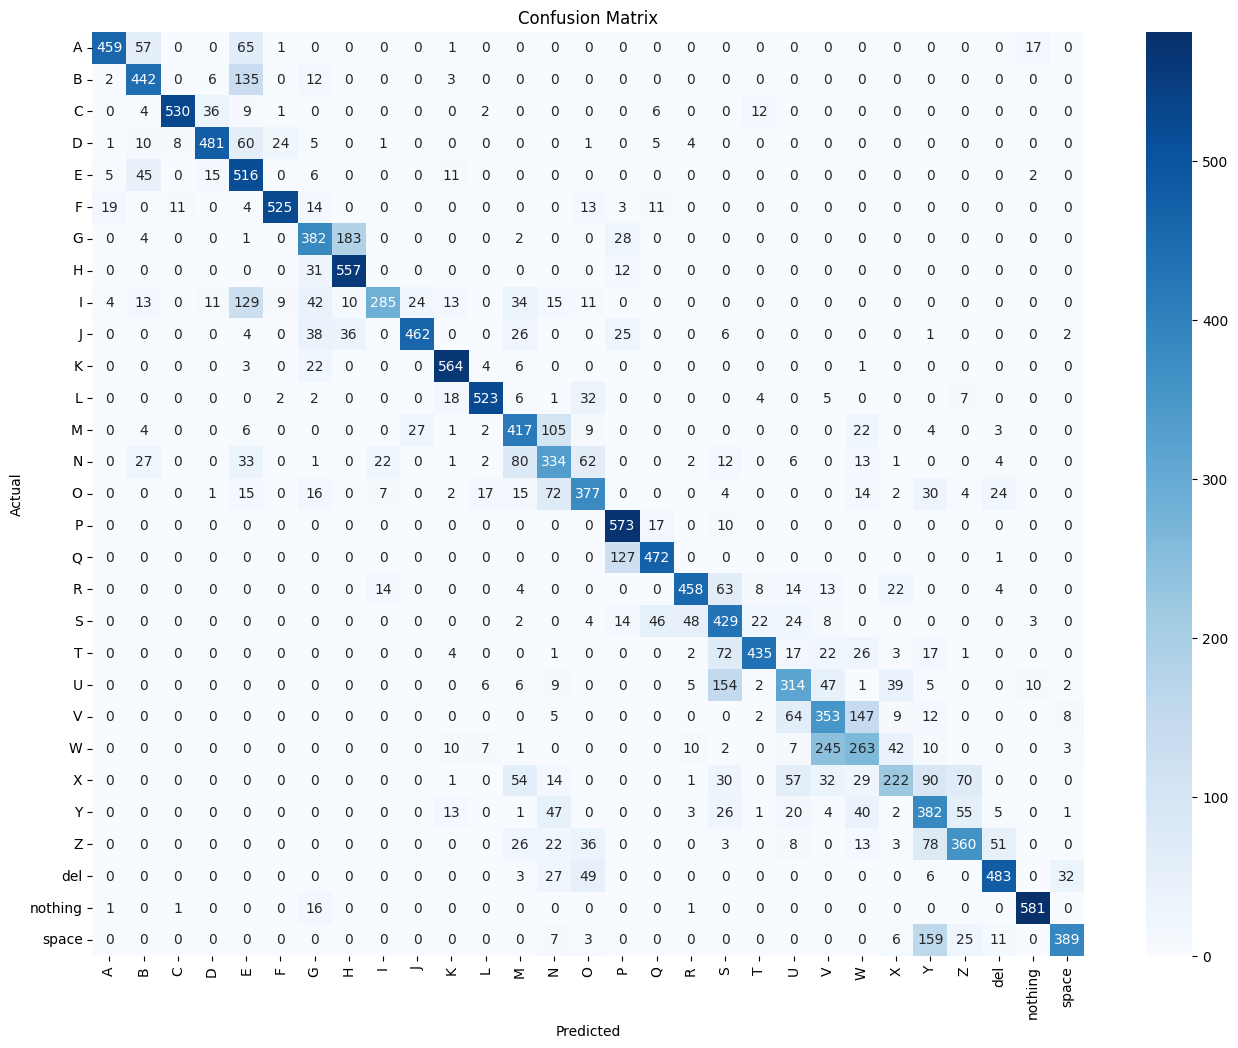

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


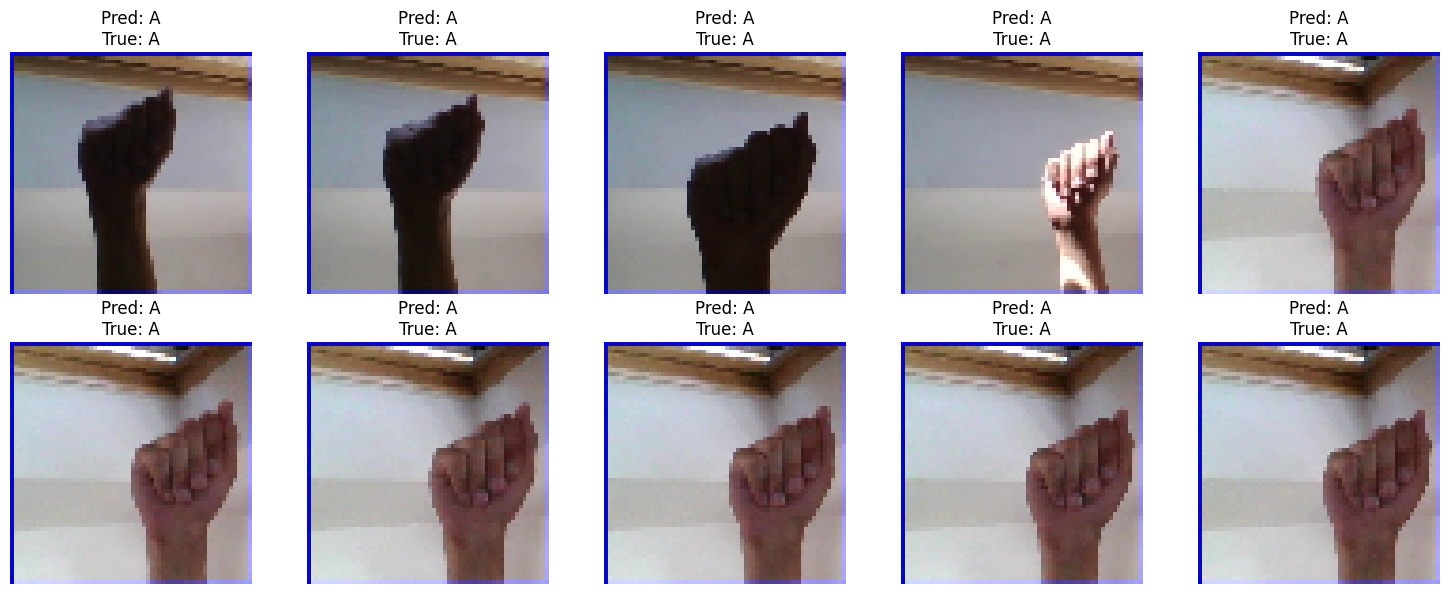

In [ ]:
# Step 1: Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

# Step 2: Download ASL dataset using kagglehub
import kagglehub

path = kagglehub.dataset_download("grassknoted/asl-alphabet")
print("Dataset base path:", path)

# Update dataset path
dataset_path = os.path.join(path, "asl_alphabet_train", "asl_alphabet_train")

# Step 3: Setup image generators
IMG_SIZE = (64, 64)
BATCH_SIZE = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Important for consistent evaluation
)

# Step 4: Load the trained model
model = load_model("signlanguagemodel.h5")  # Or .keras if you used that extension

# Step 5: Predict on validation set
y_true = []
y_pred = []

for i in range(len(val_data)):
    x_batch, y_batch = next(val_data)
    preds = model.predict(x_batch)
    y_true.extend(np.argmax(y_batch, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

labels = list(train_data.class_indices.keys())

# Step 6: Classification Report
print("📋 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))

# Step 7: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(16, 12))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 8: Visualize sample predictions
x_batch, y_batch = next(val_data)
predicted_classes = np.argmax(model.predict(x_batch), axis=1)
true_classes = np.argmax(y_batch, axis=1)

plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_batch[i])
    plt.title(f"Pred: {labels[predicted_classes[i]]}\nTrue: {labels[true_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Visual Prediction Results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


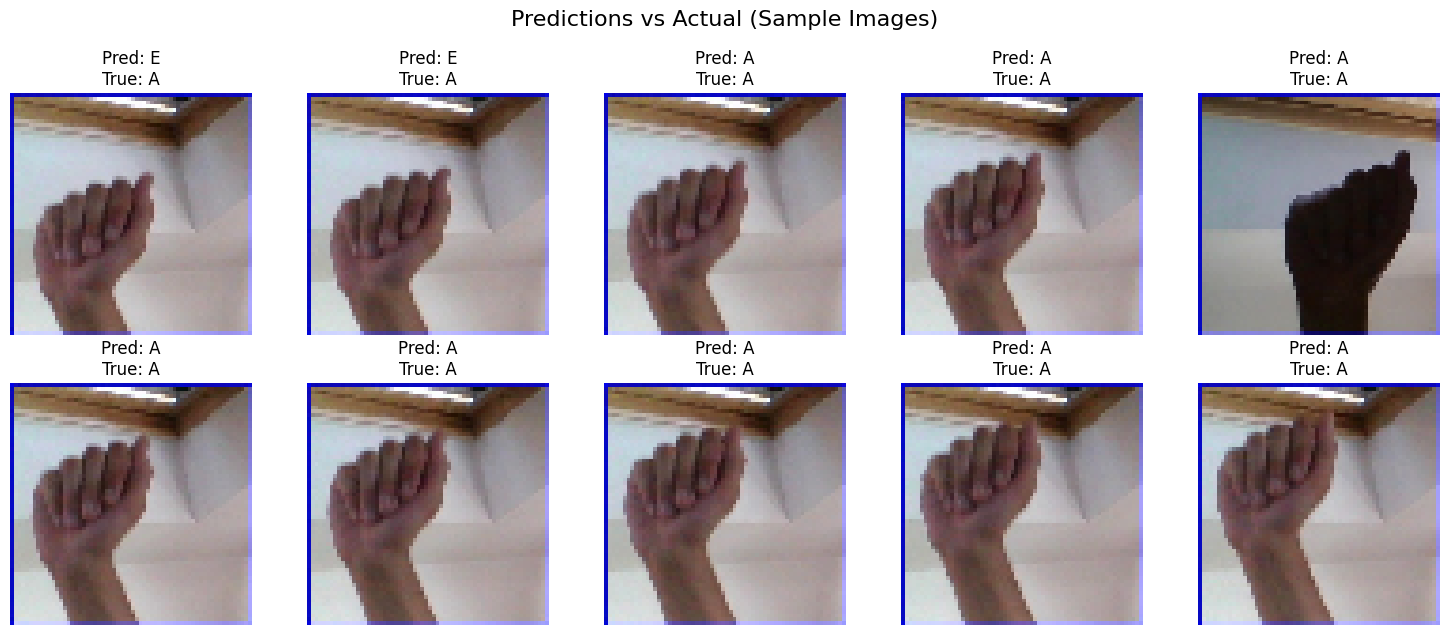

In [ ]:
x_batch, y_batch = next(val_data)
preds = model.predict(x_batch)
predicted_classes = np.argmax(preds, axis=1)
true_classes = np.argmax(y_batch, axis=1)

plt.figure(figsize=(15, 6))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_batch[i])
    plt.title(f"Pred: {labels[predicted_classes[i]]}\nTrue: {labels[true_classes[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.suptitle("Predictions vs Actual (Sample Images)", fontsize=16, y=1.05)
plt.show()



Dataset Distribution Plot

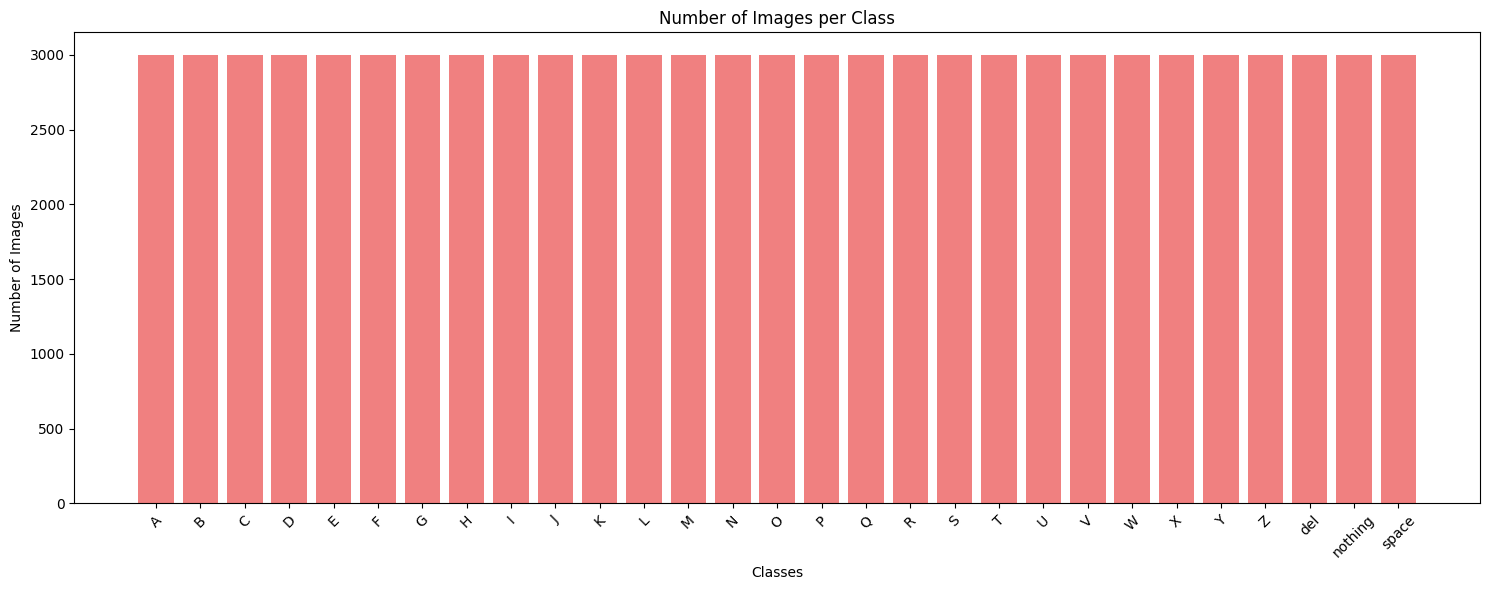

In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/asl_alphabet_train/asl_alphabet_train"
class_counts = {}

for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        class_counts[class_name] = len(os.listdir(class_dir))

class_counts = dict(sorted(class_counts.items()))

plt.figure(figsize=(15, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='lightcoral')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Confusion Matrix Heatmap & Classification Report

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report


/tmp/ipython-input-19-3448651450.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


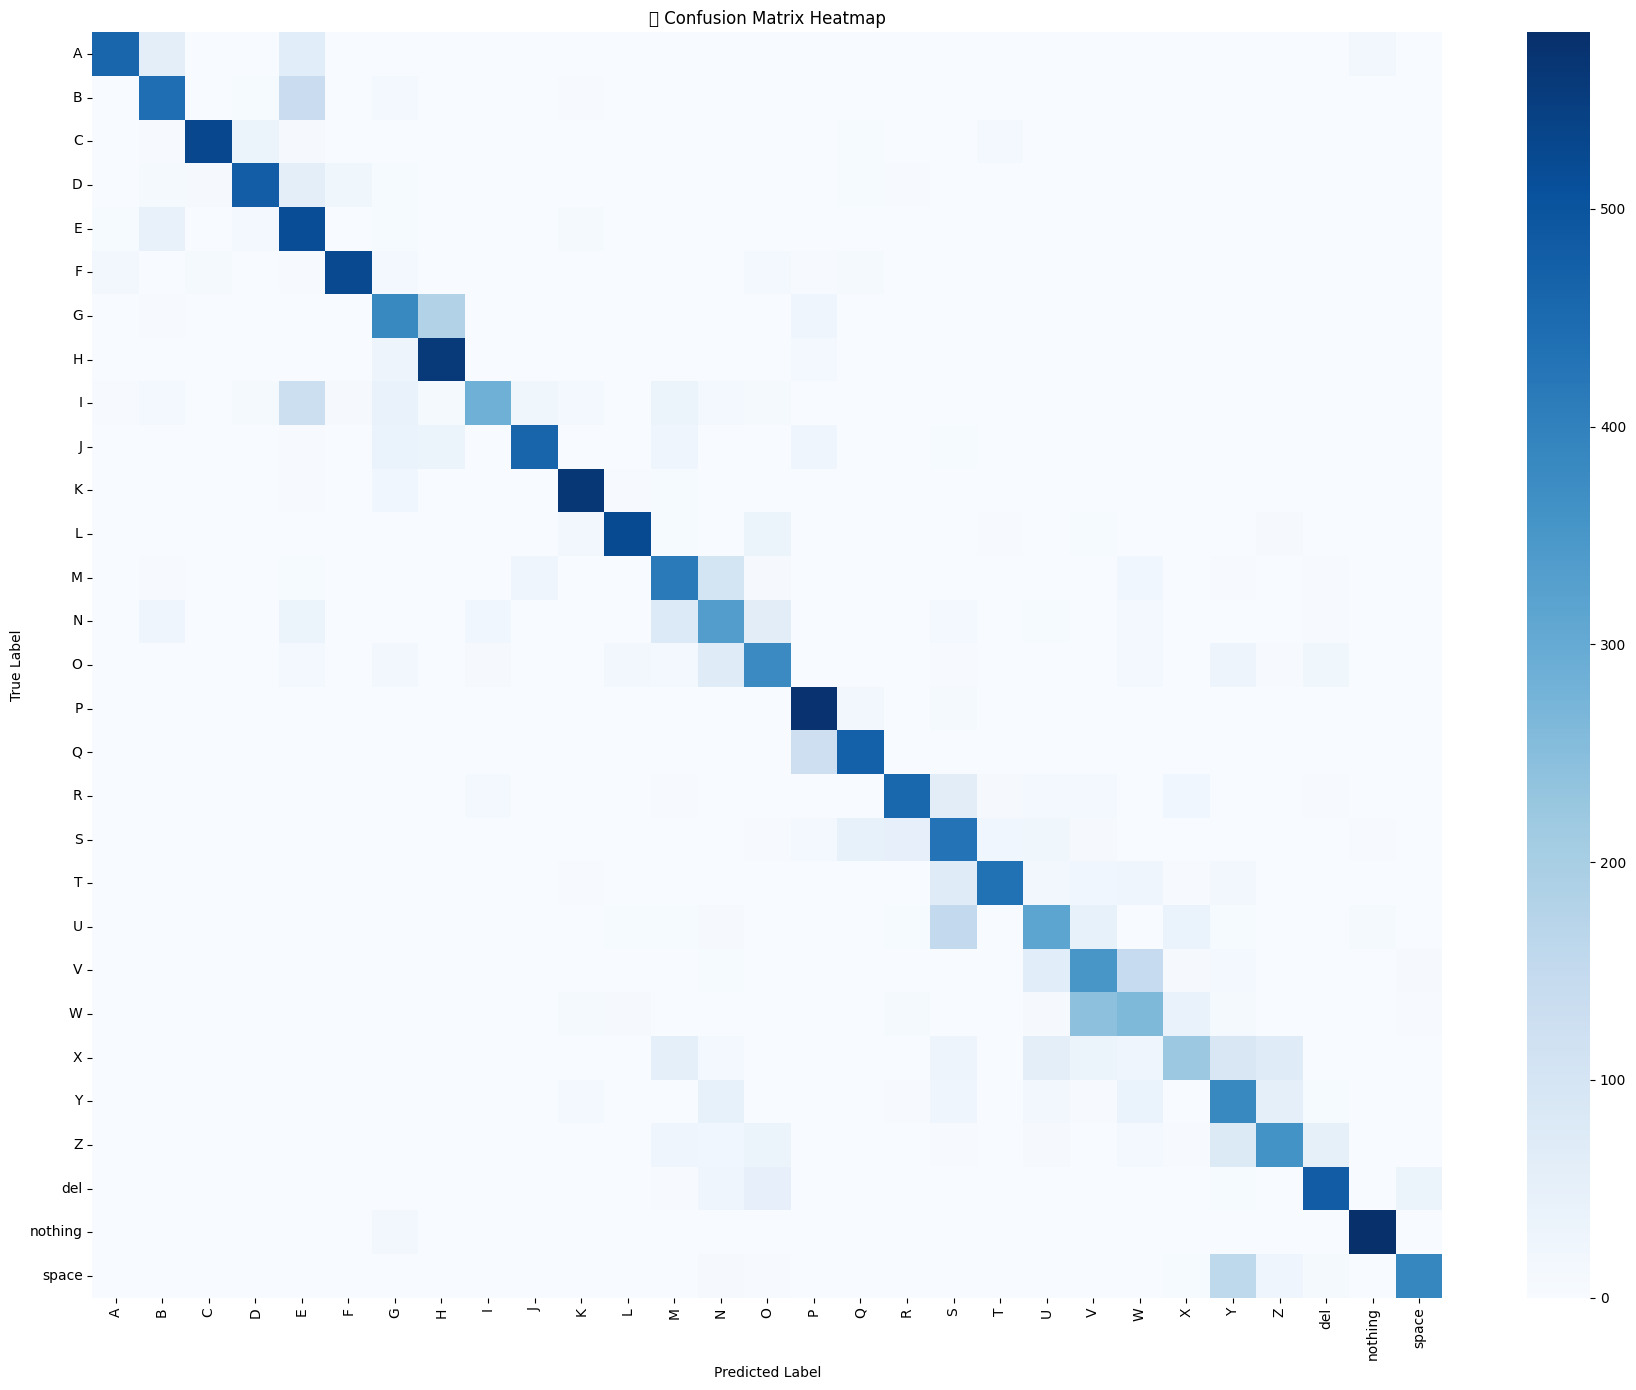

/tmp/ipython-input-19-3448651450.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=f1_scores, palette="magma")
/tmp/ipython-input-19-3448651450.py:29: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


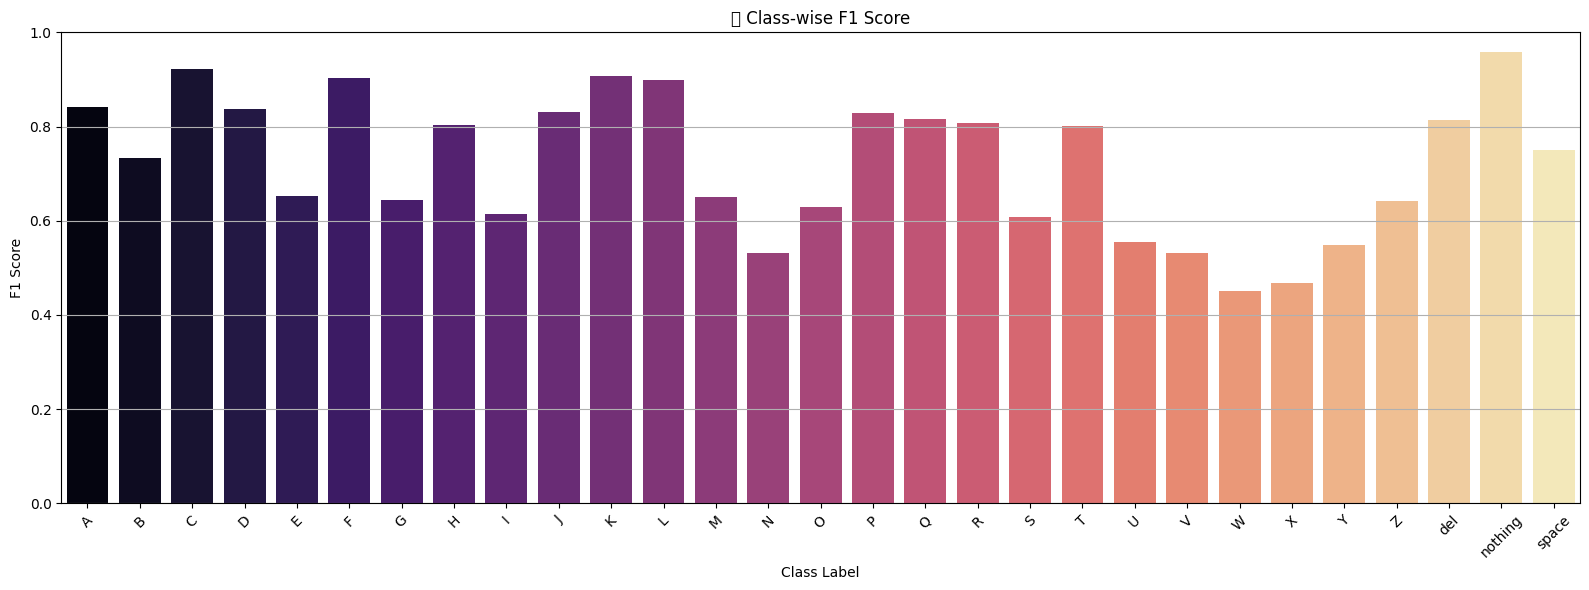

In [ ]:

# 1️⃣ Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(18, 14))
sns.heatmap(cm, annot=False, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("📊 Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 2️⃣ Classification Report -> Extract F1-scores
report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)

# Extracting F1-scores
f1_scores = [report[label]["f1-score"] for label in labels]

# 3️⃣ F1 Score Plot
plt.figure(figsize=(16, 6))
sns.barplot(x=labels, y=f1_scores, palette="magma")
plt.ylim(0, 1)
plt.title("🎯 Class-wise F1 Score")
plt.xlabel("Class Label")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Predict on all images in Testset

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load model
model = load_model("signlanguagemodel.h5")

# Class labels must match training order
class_labels = [
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
    'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space'
]

# Prediction function
def predict_gesture(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    return class_labels[class_index]

# Path to test images
test_folder = "/content/asl_alphabet_test/asl_alphabet_test"

# Loop over each test image
total = 0
correct = 0

# Optional: to collect misclassified images
misclassified = []

# Loop over each test image
for fname in os.listdir(test_folder):
    if fname.endswith('.jpg') or fname.endswith('.png'):
        img_path = os.path.join(test_folder, fname)
        predicted = predict_gesture(img_path)

        # True label from file name (e.g., "A_test.jpg" → "A")
        actual = fname.split('_')[0]

        total += 1
        if predicted == actual:
            correct += 1
        else:
            misclassified.append((fname, actual, predicted))

# Print results
print(f"\n✅ Total Images Tested: {total}")
print(f"🎯 Correct Predictions: {correct}")
print(f"❌ Incorrect Predictions: {len(misclassified)}")
print(f"📊 Accuracy: {correct / total:.2%}")

# Optional: Show misclassified examples
if misclassified:
    print("\nMisclassified examples:")
    for i, (fname, actual, pred) in enumerate(misclassified[:5]):  # show first 5
        print(f"{fname} → Predicted: {pred}, Actual: {actual}")
        img = image.load_img(os.path.join(test_folder, fname))
        plt.imshow(img)
        plt.title(f"❌ {fname} | Pred: {pred} | Actual: {actual}")
        plt.axis('off')
        plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━

Predict on a Single Image


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


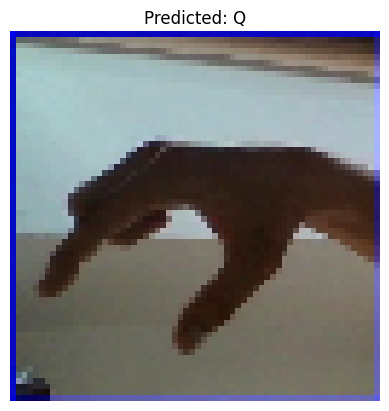

🧠 Predicted Gesture: Q


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model("signlanguagemodel.h5")

# List of class labels (in the same order used in training)
class_labels = [
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
    'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space'
]

# Function to predict and show a single image
def predict_single_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    predicted_label = class_labels[class_index]

    # Show image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

    print(f"🧠 Predicted Gesture: {predicted_label}")

# 🔍 Test with an image (update path as needed)
predict_single_image("/content/asl_alphabet_test/asl_alphabet_test/Q_test.jpg")


In [ ]:
import zipfile
import os

zip_path = "/content/asl_alphabet_test.zip"
extract_path = "/content/asl_alphabet_test"

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Unzipped to:", extract_path)


✅ Unzipped to: /content/asl_alphabet_test


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


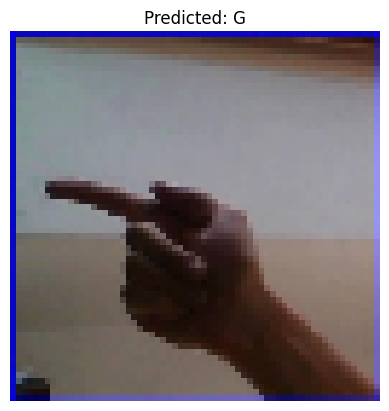

Predicted Class: G


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# 1. Load the saved model
model = load_model('signlanguage_model.h5')  # or 'model.keras'

# 2. Define the class labels (replace with your actual label order)
class_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
                'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

# 3. Load and preprocess the image
img_path = '/content/asl_alphabet_test/asl_alphabet_test/G_test.jpg'  # e.g., "test_images/G_test.jpg"
img = image.load_img(img_path, target_size=(64, 64))  # Resize to match training
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# 4. Predict
predictions = model.predict(img_array)
predicted_class = class_labels[np.argmax(predictions)]

# 5. Show result
plt.imshow(img)
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')
plt.show()

print("Predicted Class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


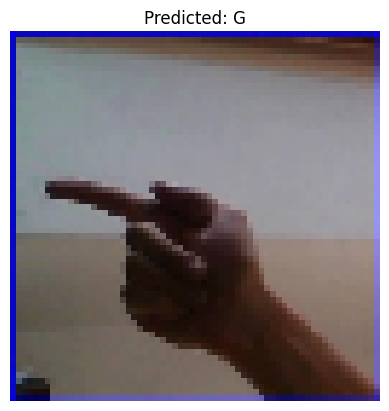

Predicted Class: G


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# 1. Load the saved model
model = load_model('signlanguage_model.h5')  # or 'model.keras'

# 2. Define the class labels (replace with your actual label order)
class_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
                'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

# 3. Load and preprocess the image
img_path = '/content/asl_alphabet_test/asl_alphabet_test/G_test.jpg'  # e.g., "test_images/G_test.jpg"
img = image.load_img(img_path, target_size=(64, 64))  # Resize to match training
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# 4. Predict
predictions = model.predict(img_array)
predicted_class = class_labels[np.argmax(predictions)]

# 5. Show result
plt.imshow(img)
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')
plt.show()

print("Predicted Class:", predicted_class)


Sign Language Alphabet Prediction

*   Developed and trained a Convolutional Neural Network (CNN) model using TensorFlow and Keras to classify images of American Sign Language (ASL) alphabet.
*   Processed and augmented image data using `ImageDataGenerator` for improved model generalization and performance.
*   Achieved high accuracy on the test set (100% in the provided notebook) for predicting individual ASL signs.
*   Visualized model performance through accuracy plots, confusion matrices, and sample prediction visualizations.